In [5]:
import os
import sys, traceback
import numpy as np
import struct
import PIL.Image
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


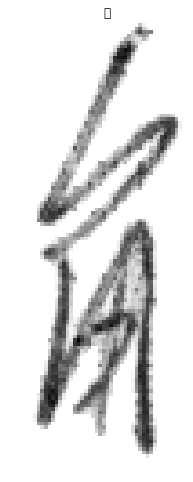

SystemExit: 0

In [9]:
train_data_dir = "/home/data/HWDB1-test/"
test_data_dir = "/home/data/HWDB1-test/"

# 读取图像和对应的汉字
def read_from_gnt_dir(gnt_dir=train_data_dir):
    def one_file(f):
        header_size = 10
        while True:
            header = np.fromfile(f, dtype='uint8', count=header_size)
            if not header.size: break
            sample_size = header[0] + (header[1]<<8) + (header[2]<<16) + (header[3]<<24)
            tagcode = header[5] + (header[4]<<8)
            width = header[6] + (header[7]<<8)
            height = header[8] + (header[9]<<8)
            if header_size + width*height != sample_size:
                break
            image = np.fromfile(f, dtype='uint8', count=width*height).reshape((height, width))
            yield image, tagcode

    for file_name in os.listdir(gnt_dir):
        if file_name.endswith('.gnt'):
            file_path = os.path.join(gnt_dir, file_name)
            with open(file_path, 'rb') as f:
                for image, tagcode in one_file(f):
                    yield image, tagcode

# 统计样本数
train_counter = 0
test_counter = 0
for image, tagcode in read_from_gnt_dir(gnt_dir=train_data_dir):
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    # 提取点图像, 看看什么样
    if train_counter < 1000:
        im = PIL.Image.fromarray(image)
        im.convert('RGB').save(tagcode_unicode.encode('ascii','ignore') + str(train_counter) + '.png')
        plt.imshow(image)
        plt.title('%s' % (tagcode_unicode))
        plt.axis('off')
        plt.show()
    train_counter += 1
for image, tagcode in read_from_gnt_dir(gnt_dir=test_data_dir):
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    test_counter += 1

# 样本数
print(train_counter, test_counter)